In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from skimage import io
from skimage.util import img_as_ubyte, img_as_float
from sklearn.preprocessing import StandardScaler
from skimage.exposure import rescale_intensity
from sklearn.decomposition import PCA

In [3]:
img_before = io.imread("/Users/wojpon/Developer/DTU/MfAnSI/remote-sensing/coral-reef-project/image1988.tif")
img_after = io.imread("/Users/wojpon/Developer/DTU/MfAnSI/remote-sensing/coral-reef-project/image2011.tif")

In [4]:
img_before_R = img_before[:, :, 2]
img_before_G = img_before[:, :, 1]
img_before_B = img_before[:, :, 0]
img_before_N = img_before[:, :, 3]

img_after_R = img_after[:, :, 2]
img_after_G = img_after[:, :, 1]
img_after_B = img_after[:, :, 0]
img_after_N = img_after[:, :, 3]

In [5]:
img_before = np.stack([img_before_R, img_before_G, img_before_B, img_before_N], axis=2)
img_after = np.stack([img_after_R, img_after_G, img_after_B, img_after_N], axis=2)

### Exploratory analysis

In [6]:
img_before_flat = img_before.reshape([img_before.shape[0] * img_before.shape[1], img_before.shape[2]])
img_after_flat = img_after.reshape([img_after.shape[0] * img_after.shape[1], img_after.shape[2]])

In [ ]:
img_before_pd = pd.DataFrame(img_before_flat, columns=["RED", "GREEN", "BLUE", "NIR"])
img_after_pd = pd.DataFrame(img_after_flat, columns=["RED", "GREEN", "BLUE", "NIR"])

In [ ]:
# img_before_pd["IMAGE"] = "Before"
# img_after_pd["IMAGE"] = "After"

In [ ]:
# img_before_pd["idx"] = img_before_pd.index
# img_after_pd["idx"] = img_after_pd.index

In [ ]:
# merge = pd.merge(img_before_pd, img_after_pd, on="idx")
# merge = merge.drop("idx", axis=1)

In [ ]:
# px.histogram(
#     data_frame=img_before_pd[["RED", "GREEN", "BLUE", "NIR"]],
#     barmode="group",
#     nbins=80,
#     range_x=[0, 80],
#     histnorm="percent",
#     title="Pixel values distribution - Before",
#     width=500,
#     height=500,
#     color_discrete_sequence=["#e88684", "#8be884", "#84b3e8", "#e884cd"]
# )

In [ ]:
px.histogram(
    data_frame=img_after_pd[["RED", "GREEN", "BLUE", "NIR"]],
    barmode="group",
    nbins=80,
    range_x=[0, 80],
    histnorm="percent",
    title="Pixel values distribution - After",
    width=500,
    height=500,
    color_discrete_sequence=["#e88684", "#8be884", "#84b3e8", "#e884cd"]
)

In [7]:
NDVI_before = (img_before[:, :, 3] - img_before[:, :, 0]) / (img_before[:, :, 3] + img_before[:, :, 0])
NDVI_after = (img_after[:, :, 3] - img_after[:, :, 0]) / (img_after[:, :, 3] + img_after[:, :, 0])

/Users/wojpon/miniconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


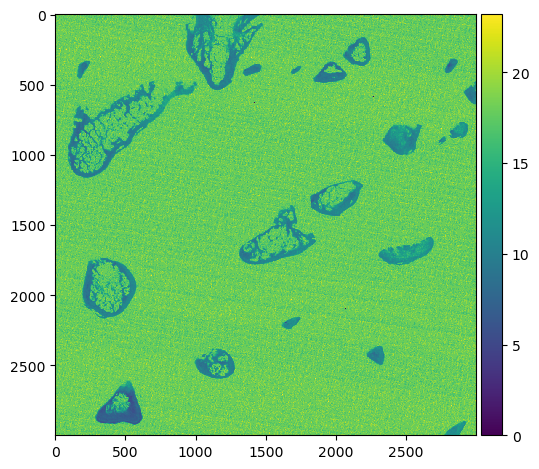

In [8]:
io.imshow(NDVI_before)

In [9]:
NDVI_before[500, 200]

18.0

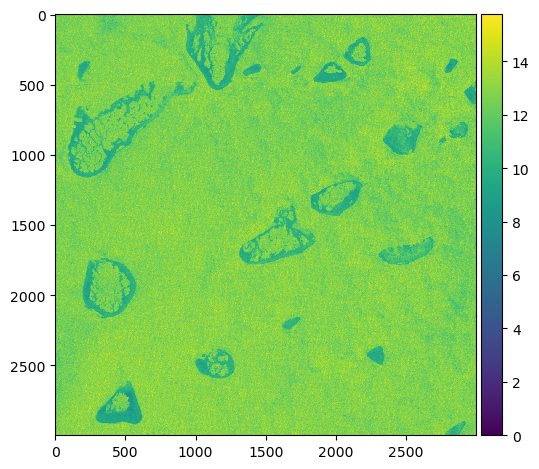

In [29]:
io.imshow(NDVI_after)

In [11]:
NDVI_after[500, 200]

12.5